# Binary Classification with Software Defects Detect

#### Using Logistic Binary Regression Method

In [21]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import precision_score, recall_score

In [84]:
trainData = pd.read_csv('BinaryClassification_train.csv')
trainData.head(5)

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [85]:
testData = pd.read_csv('BinaryClassification_test.csv')
testData.head(5)

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [24]:
trainData.shape,testData.shape

((101763, 23), (67842, 22))

In [25]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [26]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

# Step2 Data Cleaning

In [27]:
trainData.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

#### no missing or null values present in data .

In [28]:
# trainData['defects'] = trainData['defects'].map({'True':'1','False':'0'})

# Step 3 : Train and Test Splitting the model

## Without Treating Class Imbalance

In [29]:
X_train = trainData.drop(['id','defects'],axis =1)

In [30]:
y_train = trainData['defects']

In [31]:
# from sklearn.model_selection import train_test_split

In [32]:
# X_train ,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state = 42)

In [33]:
X_train.shape , y_train.shape

((101763, 21), (101763,))

In [34]:
X_test= testData.drop(['id'],axis =1)

In [35]:
y_test=testData

### Scaling Features

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[-0.28108282, -0.31549702, -0.39838633, ..., -0.18776212,
        -0.24060855, -0.33578367],
       [-0.42760261, -0.44206622, -0.39838633, ..., -0.37908167,
        -0.35219708, -0.47455019],
       [-0.48254753, -0.44206622, -0.39838633, ..., -0.2834219 ,
        -0.31035138, -0.47455019],
       ...,
       [-0.20782293, -0.56863542, -0.39838633, ..., -0.06340441,
        -0.15691715, -0.61331671],
       [-0.50086251, -0.44206622, -0.39838633, ..., -0.32168581,
        -0.28245425, -0.47455019],
       [ 1.80682418,  1.583041  ,  3.27233773, ...,  0.9984191 ,
         1.33557943,  1.74571413]])

In [38]:
X_test_scaled

array([[-0.07961811, -0.06235862, -0.39838633, ...,  0.28097078,
         0.24759126, -0.05825063],
       [-0.18950796,  0.31734899,  1.11308828, ...,  0.11834916,
         0.13600274,  0.35804893],
       [ 1.69693433,  0.69705659,  0.89716334, ...,  2.63420126,
         2.85597314,  0.77434849],
       ...,
       [-0.24445288, -0.44206622, -0.39838633, ..., -0.20689408,
        -0.29640282, -0.47455019],
       [-0.35434272, -0.44206622, -0.39838633, ..., -0.27385592,
        -0.24060855, -0.47455019],
       [ 1.1658001 ,  1.20333339,  1.54493817, ..., -0.55126927,
        -0.54747701,  1.32941457]])

# Step 4 Model Building

In [39]:
lr = LogisticRegression()

In [40]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                defects   No. Observations:               101763
Model:                            GLM   Df Residuals:                   101741
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45693.
Date:                Sun, 15 Oct 2023   Deviance:                       91385.
Time:                        19:21:07   Pearson chi2:                 3.96e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1583
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4189      0.041    -59.218      0.000      -2.499      -2.339
loc                   0.0248      0.001     39.077      0.000       0.024       0.026
v(g)                 -0.0371      0.012     -3.146      0.002      -0.060      -0.014
ev(g)                -0.0084      0.003     -2.615      0.009      -0.015      -0.002
iv(g)                 0.0087      0.004      2.258      0.024       0.001       0.016
n                  9.459e-05      0.000      0.303      0.762      -0.001       0.001
v                    -0.0001   4.39e-05     -3.380      0.001      -0.000   -6.23e-05
l                    -2.3832      0.158    -15.071      0.000      -2.693      -2.073
d                     0.0113      0.002      6.903      0.000       0.008       0.014
i                     0.0067      0.001      6.913      0.000       0.005       0.009
e                 -1.331e-07   9.45e-08     -1.408      0.159   -3.18e-07    5.22e-08
b                    -0.2271      0.084     -2.708      0.007      -0.392      -0.063
t                 -1.146e-05   2.26e-06     -5.063      0.000   -1.59e-05   -7.03e-06
lOCode               -0.0179      0.001    -16.753      0.000      -0.020      -0.016
lOComment            -0.0062      0.002     -3.207      0.001      -0.010      -0.002
lOBlank               0.0145      0.003      5.520      0.000       0.009       0.020
locCodeAndComment     0.0420      0.008      5.122      0.000       0.026       0.058
uniq_Op               0.0164      0.003      5.254      0.000       0.010       0.023
uniq_Opnd             0.0194      0.002      9.175      0.000       0.015       0.024
total_Op             -0.0003      0.000     -0.744      0.457      -0.001       0.001
total_Opnd           -0.0025      0.001     -3.246      0.001      -0.004      -0.001
branchCount           0.0326      0.006      5.368      0.000       0.021       0.044
=====================================================================================
"""

# Step 5: Feature Selection Using RFE

In [41]:
rfe = RFE(lr,step=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), step=15)

In [42]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False])

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loc', True, 1),
 ('v(g)', True, 1),
 ('ev(g)', True, 1),
 ('iv(g)', True, 1),
 ('n', True, 1),
 ('v', False, 2),
 ('l', False, 2),
 ('d', True, 1),
 ('i', True, 1),
 ('e', False, 2),
 ('b', False, 2),
 ('t', False, 2),
 ('lOCode', False, 2),
 ('lOComment', True, 1),
 ('lOBlank', False, 2),
 ('locCodeAndComment', False, 2),
 ('uniq_Op', True, 1),
 ('uniq_Opnd', True, 1),
 ('total_Op', False, 2),
 ('total_Opnd', False, 2),
 ('branchCount', False, 2)]

In [44]:
col=X_train.columns[rfe.support_]
col

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'd', 'i', 'lOComment', 'uniq_Op',
       'uniq_Opnd'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['v', 'l', 'e', 'b', 't', 'lOCode', 'lOBlank', 'locCodeAndComment',
       'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')

#### Assessing the model with StatsModels

In [46]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                defects   No. Observations:               101763
Model:                            GLM   Df Residuals:                   101752
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46298.
Date:                Sun, 15 Oct 2023   Deviance:                       92595.
Time:                        19:21:09   Pearson chi2:                 1.58e+16
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1483
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7331      0.028    -98.808      0.000      -2.787      -2.679
loc            0.0260      0.001     51.600      0.000       0.025       0.027
v(g)           0.0235      0.004      6.537      0.000       0.016       0.030
ev(g)          0.0006      0.003      0.171      0.864      -0.006       0.007
iv(g)          0.0050      0.004      1.223      0.221      -0.003       0.013
n             -0.0052      0.000    -26.682      0.000      -0.006      -0.005
d              0.0117      0.002      6.691      0.000       0.008       0.015
i              0.0050      0.001      5.223      0.000       0.003       0.007
lOComment     -0.0076      0.002     -3.806      0.000      -0.012      -0.004
uniq_Op        0.0203      0.003      6.663      0.000       0.014       0.026
uniq_Opnd      0.0163      0.002      7.692      0.000       0.012       0.021
==============================================================================
"""

In [47]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.163878
1    0.131351
2    0.119853
3    0.099239
4    0.108044
5    0.164560
6    0.176058
7    0.133912
8    0.258166
9    0.102084
dtype: float64

Creating a dataframe with the actual converted flag and the predicted probabilities

In [48]:
# creating a dataframe
y_train_pred_final = pd.DataFrame({'defects':y_train.values, 'defects_Prob':y_train_pred})
y_train_pred_final['id'] = y_train.index
y_train_pred_final.head()

,defects,defects_Prob,id
0,False,0.163878,0
1,False,0.131351,1
2,False,0.119853,2
3,True,0.099239,3
4,False,0.108044,4


Creating new column 'predicted' with 1 if Converted_Prob == 0.5 else 0

In [49]:
y_train_pred_final['predicted'] = y_train_pred_final.defects_Prob.map(lambda x: 1 if x == 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,defects,defects_Prob,id,predicted
0,False,0.163878,0,0
1,False,0.131351,1,0
2,False,0.119853,2,0
3,True,0.099239,3,0
4,False,0.108044,4,0


In [50]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.defects, y_train_pred_final.predicted )
print(confusion)

[[78699     0]
 [23064     0]]


In [51]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.defects, y_train_pred_final.predicted))

0.7733557383331859


#### Checking VIFs

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,d,10.48
8,uniq_Op,9.26
9,uniq_Opnd,8.68
4,n,8.43
1,v(g),7.83
6,i,7.31
0,loc,5.51
3,iv(g),4.27
2,ev(g),3.10
7,lOComment,1.69


In [53]:
#### as d is having very high p value.Hence we are dropping it.

In [54]:
col = col.drop('d',1)

In [55]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                defects   No. Observations:               101763
Model:                            GLM   Df Residuals:                   101753
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46309.
Date:                Sun, 15 Oct 2023   Deviance:                       92618.
Time:                        19:21:10   Pearson chi2:                 1.36e+16
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1481
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7553      0.028   -100.186      0.000      -2.809      -2.701
loc            0.0262      0.001     51.892      0.000       0.025       0.027
v(g)           0.0258      0.004      7.147      0.000       0.019       0.033
ev(g)          0.0005      0.003      0.141      0.888      -0.006       0.007
iv(g)          0.0028      0.004      0.677      0.498      -0.005       0.011
n             -0.0044      0.000    -28.682      0.000      -0.005      -0.004
i              0.0042      0.001      4.433      0.000       0.002       0.006
lOComment     -0.0070      0.002     -3.459      0.001      -0.011      -0.003
uniq_Op        0.0347      0.002     16.064      0.000       0.030       0.039
uniq_Opnd      0.0126      0.002      6.072      0.000       0.009       0.017
==============================================================================
"""

In [56]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.162802
1    0.134359
2    0.123818
3    0.100675
4    0.107763
5    0.171889
6    0.179097
7    0.128770
8    0.262181
9    0.102558
dtype: float64

In [57]:
y_train_pred_final['defects_Prob'] = y_train_pred

In [58]:
# Creating new column 'predicted' with 1 if Converted_Prob == 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.defects_Prob.map(lambda x: 1 if x == 0.5 else 0)
y_train_pred_final.head()

,defects,defects_Prob,id,predicted
0,False,0.162802,0,0
1,False,0.134359,1,0
2,False,0.123818,2,0
3,True,0.100675,3,0
4,False,0.107763,4,0


In [59]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.defects, y_train_pred_final.predicted))

0.7733557383331859


#### Checking VIF

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,uniq_Opnd,8.68
1,v(g),7.75
5,i,6.58
4,n,5.64
0,loc,5.50
3,iv(g),4.16
7,uniq_Op,4.08
2,ev(g),3.10
6,lOComment,1.68


In [61]:
#### as uniq_Opnd is having very high p value.Hence we are dropping it.

In [62]:
col=col.drop('uniq_Opnd',1)

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                defects   No. Observations:               101763
Model:                            GLM   Df Residuals:                   101754
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46329.
Date:                Sun, 15 Oct 2023   Deviance:                       92658.
Time:                        19:21:11   Pearson chi2:                 1.13e+16
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1477
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8217      0.025   -111.188      0.000      -2.871      -2.772
loc            0.0269      0.000     54.479      0.000       0.026       0.028
v(g)           0.0251      0.004      6.947      0.000       0.018       0.032
ev(g)          0.0002      0.003      0.074      0.941      -0.006       0.007
iv(g)          0.0056      0.004      1.391      0.164      -0.002       0.013
n             -0.0041      0.000    -27.842      0.000      -0.004      -0.004
i              0.0087      0.001     14.194      0.000       0.007       0.010
lOComment     -0.0072      0.002     -3.612      0.000      -0.011      -0.003
uniq_Op        0.0418      0.002     23.341      0.000       0.038       0.045
==============================================================================
"""

In [64]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.167127
1    0.133232
2    0.124469
3    0.101465
4    0.105842
5    0.180853
6    0.182069
7    0.127420
8    0.249890
9    0.103905
dtype: float64

In [65]:
y_train_pred_final['defects_Prob'] = y_train_pred

In [66]:
# Creating new column 'predicted' with 1 if Converted_Prob == 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.defects_Prob.map(lambda x: 1 if x == 0.5 else 0)
y_train_pred_final.head()

,defects,defects_Prob,id,predicted
0,False,0.167127,0,0
1,False,0.133232,1,0
2,False,0.124469,2,0
3,True,0.101465,3,0
4,False,0.105842,4,0


In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.defects, y_train_pred_final.predicted))

0.7733557383331859


#### Checking VIF

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,v(g),7.69
0,loc,5.50
4,n,4.83
5,i,4.82
3,iv(g),4.03
7,uniq_Op,3.91
2,ev(g),3.01
6,lOComment,1.68


In [69]:
col = col.drop('v(g)',1)

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                defects   No. Observations:               101763
Model:                            GLM   Df Residuals:                   101755
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46351.
Date:                Sun, 15 Oct 2023   Deviance:                       92703.
Time:                        19:21:12   Pearson chi2:                 1.15e+16
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1474
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8108      0.025   -111.207      0.000      -2.860      -2.761
loc            0.0281      0.000     60.939      0.000       0.027       0.029
ev(g)          0.0149      0.003      5.929      0.000       0.010       0.020
iv(g)          0.0182      0.004      4.936      0.000       0.011       0.025
n             -0.0040      0.000    -27.189      0.000      -0.004      -0.004
i              0.0076      0.001     12.925      0.000       0.006       0.009
lOComment     -0.0083      0.002     -4.159      0.000      -0.012      -0.004
uniq_Op        0.0430      0.002     24.201      0.000       0.039       0.046
==============================================================================
"""

In [71]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.169042
1    0.134720
2    0.125625
3    0.102992
4    0.106925
5    0.186662
6    0.182660
7    0.127088
8    0.223924
9    0.105571
dtype: float64

In [72]:
y_train_pred_final['defects_Prob'] = y_train_pred

In [73]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.defects_Prob.map(lambda x : 1 if x==0.5 else 0)
y_train_pred_final.head()

,defects,defects_Prob,id,predicted
0,False,0.169042,0,0
1,False,0.134720,1,0
2,False,0.125625,2,0
3,True,0.102992,3,0
4,False,0.106925,4,0


In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.defects, y_train_pred_final.predicted))

0.7733557383331859


#### Checking VIF

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loc,4.95
3,n,4.68
4,i,4.63
6,uniq_Op,3.75
2,iv(g),3.15
1,ev(g),2.12
5,lOComment,1.67


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [76]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.defects, y_train_pred_final.predicted )
confusion

array([[78699,     0],
       [23064,     0]], dtype=int64)

In [136]:
print('Before Correcting Class Imbalance')
print('Classification Report  ', classification_report(y_train_pred_final.defects,y_train_pred_final.predicted ))

Before Correcting Class Imbalance
Classification Report                 precision    recall  f1-score   support

       False       0.77      1.00      0.87     78699
        True       0.00      0.00      0.00     23064

    accuracy                           0.77    101763
   macro avg       0.39      0.50      0.44    101763
weighted avg       0.60      0.77      0.67    101763



# Treating Class Balance Using undersampling Technique and again building model and studying the difference

In [99]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report,precision_score
from sklearn.preprocessing import MinMaxScaler

In [102]:
XX = trainData.drop('defects',axis =1)
yy = trainData['defects']

In [104]:
X_train,X_val,y_train,y_val = train_test_split(XX,yy,test_size=0.3,stratify = yy ,random_state=42)

In [105]:
scaler = MinMaxScaler()

In [106]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [107]:
under_sampler = RandomUnderSampler(random_state = 45)
X_sampled_us , y_sampled_us = under_sampler.fit_resample(XX,yy)
len(X_sampled_us)

46128

In [108]:
print(sorted(Counter(y_sampled_us).items()))

[(False, 23064), (True, 23064)]


In [109]:
logreg = LogisticRegression()

In [110]:
X_train = X_sampled_us 
y_train = y_sampled_us

In [111]:
X_train.shape , y_train.shape

((46128, 22), (46128,))

In [112]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_pred_train_cs = logreg.predict(X_train)

In [114]:
print('After Correcting Class Imbalance')
# print('Accuracy score  ', accuracy_score(y_train,y_pred_train))
print('Classification Report  ', classification_report(y_train,y_pred_train_cs))

After Correcting Class Imbalance
Classification Report                 precision    recall  f1-score   support

       False       0.67      0.65      0.66     23064
        True       0.66      0.69      0.67     23064

    accuracy                           0.67     46128
   macro avg       0.67      0.67      0.67     46128
weighted avg       0.67      0.67      0.67     46128



In [122]:
print('roc_curve ',metrics.roc_auc_score(y_train,y_pred_train_cs))

roc_curve  0.6675771765522026


### testing on unseen data

In [134]:
y_pred_test_cs = logreg.predict(X_val)

In [135]:
print('After Correcting Class Imbalance')
# print('Accuracy score  ', accuracy_score(y_train,y_pred_train))
print('Classification Report  ', classification_report(y_val,y_pred_test_cs))
print('roc_curve ',metrics.roc_auc_score(y_val,y_pred_test_cs))

After Correcting Class Imbalance
Classification Report                 precision    recall  f1-score   support

       False       0.90      0.67      0.76     23610
        True       0.39      0.74      0.51      6919

    accuracy                           0.68     30529
   macro avg       0.64      0.70      0.64     30529
weighted avg       0.78      0.68      0.71     30529

roc_curve  0.7006914371104519


In [137]:
y_pred_test_cs

array([False, False, False, ...,  True, False,  True])

# Step 9: Plotting the ROC Curve

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.defects, y_train_pred_final.defects_Prob, drop_intermediate = False )

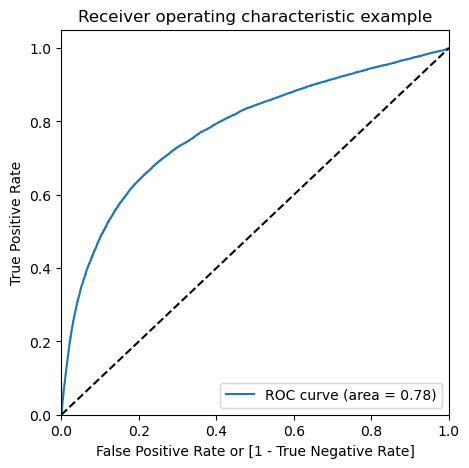

In [125]:
draw_roc(y_train_pred_final.defects, y_train_pred_final.defects_Prob)

In [126]:
print('roc_curve ',metrics.roc_auc_score(y_train_pred_final.defects,y_train_pred_final.defects_Prob))

roc_curve  0.778763537493278


In [67]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.defects_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,defects,defects_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,False,0.169042,0,0,1,1,0,0,0,0,0,0,0,0
1,False,0.134720,1,0,1,1,0,0,0,0,0,0,0,0
2,False,0.125625,2,0,1,1,0,0,0,0,0,0,0,0
3,True,0.102992,3,0,1,1,0,0,0,0,0,0,0,0
4,False,0.106925,4,0,1,1,0,0,0,0,0,0,0,0


In [68]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.defects, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.226644  1.000000  0.000000
0.1   0.1  0.314378  0.965704  0.123496
0.2   0.2  0.732683  0.694979  0.743732
0.3   0.3  0.805096  0.489898  0.897470
0.4   0.4  0.812584  0.354275  0.946899
0.5   0.5  0.807563  0.256547  0.969047
0.6   0.6  0.799406  0.182232  0.980279
0.7   0.7  0.792724  0.131374  0.986544
0.8   0.8  0.786602  0.087496  0.991487
0.9   0.9  0.782161  0.055541  0.995108


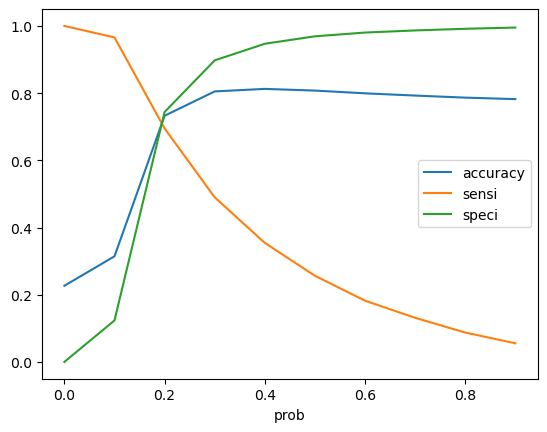

In [69]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [70]:
y_train_pred_final['final_predicted'] = y_train_pred_final.defects_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,defects,defects_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,False,0.169042,0,0,1,1,0,0,0,0,0,0,0,0,0
1,False,0.134720,1,0,1,1,0,0,0,0,0,0,0,0,0
2,False,0.125625,2,0,1,1,0,0,0,0,0,0,0,0,0
3,True,0.102992,3,0,1,1,0,0,0,0,0,0,0,0,0
4,False,0.106925,4,0,1,1,0,0,0,0,0,0,0,0,0


In [71]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.defects, y_train_pred_final.final_predicted)

0.7326828021972622

In [72]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.defects, y_train_pred_final.final_predicted )
confusion2

array([[58531, 20168],
       [ 7035, 16029]], dtype=int64)

In [73]:
TP = confusion2[1,1] # true positive TP
TN = confusion2[0,0] # true negatives TN
FP = confusion2[0,1] # false positives FP
FN = confusion2[1,0] # false negatives FN

In [74]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6949791883454735

In [75]:
# Let us calculate specificity
TN / float(TN+FP)

0.7437324489510667

In [76]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2562675510489333


In [77]:
# Positive predictive value 
print (TP / float(TP+FP))

0.4428267535983645


In [78]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8927035353689412


#### Recall and Percision

In [79]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.defects, y_train_pred_final.predicted )
confusion

array([[78699,     0],
       [23064,     0]], dtype=int64)

In [80]:
precision = precision_score(y_train_pred_final.defects, y_train_pred_final.predicted)
precision

0.0

In [81]:
recall = recall_score(y_train_pred_final.defects, y_train_pred_final.predicted)
recall

0.0

In [82]:
f1_score = 2 * (precision*recall)/(precision+recall)
f1_score

nan

In [83]:
y_train_pred_final.defects, y_train_pred_final.predicted

(0         False
 1         False
 2         False
 3          True
 4         False
           ...  
 101758    False
 101759    False
 101760    False
 101761    False
 101762    False
 Name: defects, Length: 101763, dtype: bool,
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 101758    0
 101759    0
 101760    0
 101761    0
 101762    0
 Name: predicted, Length: 101763, dtype: int64)

In [84]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.defects, y_train_pred_final.defects_Prob)

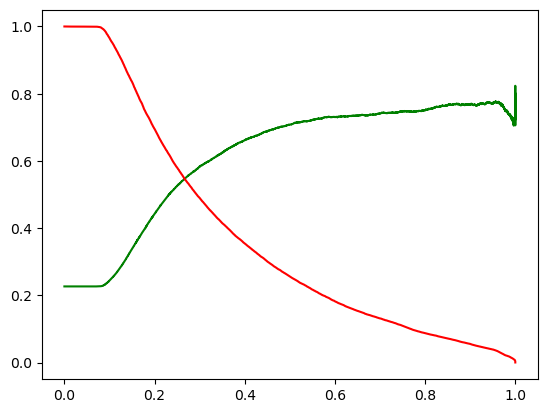

In [85]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Predicting on test set

In [86]:
X_test_scaled.shape

(67842, 21)

In [87]:
X_test = X_test[col]
X_test.head()

,loc,ev(g),iv(g),n,i,lOComment,uniq_Op
0,33.0,1.0,4.0,144.0,30.05,0,21.0
1,27.0,8.0,2.0,125.0,27.22,0,18.0
2,130.0,7.0,10.0,545.0,66.17,9,26.0
3,65.0,1.0,7.0,156.0,49.89,8,15.0
4,22.0,1.0,3.0,52.0,26.70,0,12.0


In [88]:
X_test_sm = sm.add_constant(X_test)

In [89]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.224862
1    0.195789
2    0.623727
3    0.376352
4    0.166453
5    0.301157
6    0.165142
7    0.913370
8    0.349690
9    0.127790
dtype: float64

In [90]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [91]:
# Let's see the head
y_pred_1.head()

,0
0,0.224862
1,0.195789
2,0.623727
3,0.376352
4,0.166453


In [92]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [93]:
# Putting ID to index
y_test_df['id'] = y_test_df.index

In [94]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,0
0,0,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,30,0,3,0,21.0,23.0,87.0,57.0,9.0,0.224862
1,1,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,23,0,2,0,18.0,19.0,70.0,49.0,15.0,0.195789
2,2,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,99,9,17,1,26.0,53.0,333.0,244.0,21.0,0.623727
3,3,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,45,8,10,0,15.0,26.0,88.0,60.0,13.0,0.376352
4,4,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,16,0,4,0,12.0,15.0,30.0,24.0,5.0,0.166453


In [95]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'defects_Prob'})

In [96]:
# Let's see the head of y_pred_final
y_pred_final.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects_Prob
0,0,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,30,0,3,0,21.0,23.0,87.0,57.0,9.0,0.224862
1,1,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,23,0,2,0,18.0,19.0,70.0,49.0,15.0,0.195789
2,2,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,99,9,17,1,26.0,53.0,333.0,244.0,21.0,0.623727
3,3,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,45,8,10,0,15.0,26.0,88.0,60.0,13.0,0.376352
4,4,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,16,0,4,0,12.0,15.0,30.0,24.0,5.0,0.166453


In [97]:
y_pred_final['final_predicted'] = y_pred_final.defects_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final['final_predicted'] 

0        1
1        0
2        1
3        1
4        0
        ..
67837    1
67838    0
67839    0
67840    0
67841    1
Name: final_predicted, Length: 67842, dtype: int64

In [98]:
y_pred_final.shape

(67842, 24)

In [99]:
f = y_pred_final[['defects_Prob']]

In [100]:
f.shape

(67842, 1)

In [101]:
f.head()

,defects_Prob
0,0.224862
1,0.195789
2,0.623727
3,0.376352
4,0.166453


In [102]:
sol = pd.read_csv('sample_submissionBinaryClassification.csv')
sol.head()

,id,defects
0,101763,0.5
1,101764,0.5
2,101765,0.5
3,101766,0.5
4,101767,0.5


In [103]:
final_sol = pd.concat([sol,f],axis=1)

In [104]:
s = final_sol[['id','defects_Prob']]

In [105]:
s.rename(columns = {'defects_Prob':'defects'}, inplace = True)

In [106]:
s.head()

,id,defects
0,101763,0.224862
1,101764,0.195789
2,101765,0.623727
3,101766,0.376352
4,101767,0.166453


In [107]:
g = s.to_csv('Binarysubmission.csv',index=False)